# Libraries

In [3]:
#!pip install ultralytics

In [4]:
from ultralytics import YOLO

# Creating model

In [6]:
model = YOLO("yolov8m.pt")

100%|█████████████████████████████████████████████████████████████████████████████| 49.7M/49.7M [00:29<00:00, 1.75MB/s]


# Having fun by now

In [22]:
results = model.predict("C:/Users/szymo/Desktop/Moje_Projekty_ML/1.Traffic Signs Detector/data/detection/imgs/37.jpg")


image 1/1 C:\Users\szymo\Desktop\Moje_Projekty_ML\1.Traffic Signs Detector\data\detection\imgs\37.jpg: 480x640 2 traffic lights, 470.3ms
Speed: 0.0ms preprocess, 470.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


In [23]:
result = results[0]

In [24]:
len(result.boxes)

2

In [25]:
box = result.boxes[0]

In [26]:
print('Object type: ', box.cls)
print('Coordinates: ', box.xyxy)
print('Probability: ', box.conf)

Object type:  tensor([9.])
Coordinates:  tensor([[ 572.0022, 1296.6425, 1099.9913, 2708.2439]])
Probability:  tensor([0.8492])


In [27]:
print('Object type: ', box.cls[0])
print('Coordinates: ', box.xyxy[0])
print('Probability: ', box.conf[0])

Object type:  tensor(9.)
Coordinates:  tensor([ 572.0022, 1296.6425, 1099.9913, 2708.2439])
Probability:  tensor(0.8492)


In [28]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()

In [29]:
print('Object type: ', cords)
print('Coordinates: ', class_id)
print('Probability: ', conf)

Object type:  [572.002197265625, 1296.6424560546875, 1099.9913330078125, 2708.243896484375]
Coordinates:  9.0
Probability:  0.8492118716239929


In [30]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [31]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)

In [32]:
print('Object type: ', cords)
print('Coordinates: ', class_id)
print('Probability: ', conf)

Object type:  [572, 1297, 1100, 2708]
Coordinates:  traffic light
Probability:  0.85


In [33]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: traffic light
Coordinates: [572, 1297, 1100, 2708]
Probability: 0.85
---
Object type: traffic light
Coordinates: [1090, 2274, 1437, 2730]
Probability: 0.38
---


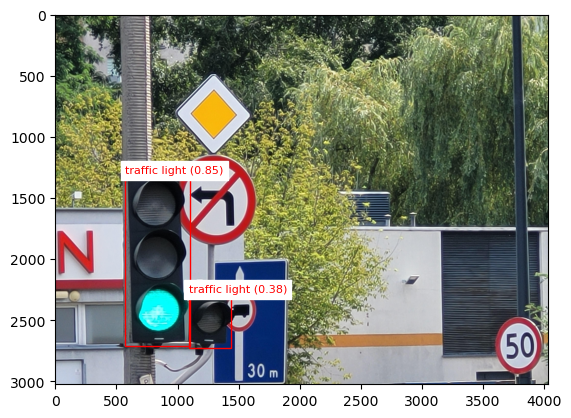

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Assuming result, result.names, and result.boxes are available

# Load the image
image_path = "C:/Users/szymo/Desktop/Moje_Projekty_ML/1.Traffic Signs Detector/data/detection/imgs/37.jpg"  # replace with the actual path to your image
image = Image.open(image_path)

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Plot bounding boxes
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    # Create a Rectangle patch
    rect = patches.Rectangle((cords[0], cords[1]), cords[2] - cords[0], cords[3] - cords[1],
                             linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Display class name and confidence
    ax.text(cords[0], cords[1], f"{class_id} ({conf})", color='r', backgroundcolor='w', fontsize=8)

# Show the plot
plt.show()